In [4]:
#Import Libraries

import numpy as np
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model



In [5]:
# code to remove spaces from column names
# df.columns = df.columns.str.replace(' ', '_')


# code for deleting redundant data frames
# >>> lst = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
# >>> del lst     # memory is released


# code for merging multiple dataframes
# from functools import reduce
# dfs = [df1, df2, df3, df4, df5, df6]
# df_final = reduce(lambda left,right: pd.merge(left,right,on='some_common_column_name'), dfs)


SyntaxError: invalid syntax (3603597892.py, line 1)

In [3]:
#LOAD IN LSOA DWELLINGS FROM CENSUS

In [6]:
df_censusLSOAdwell = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_LSOA_Dwellings.csv?raw=true", 
                                  skiprows = 6, nrows = 4994)
df_censusLSOAdwell.shape
df_censusLSOAdwell.dtypes

local authority: county / unitary (as of April 2023)     object
mnemonic                                                 object
2021                                                    float64
dtype: object

In [7]:
#LOAD IN BOROUGH LEVEL CENSUS DATA

In [9]:
df_censusdwellings = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_dwellings.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['local authority: county / unitary (as of April 2023)',
                                                                       'mnemonic', 'Total'])

df_censusdwellings.rename(columns={'local authority: county / unitary (as of April 2023)':'LAName'}, inplace = True)
df_censusdwellings.rename(columns={'Total':'Total_Dwellings'}, inplace = True)

#df_censusdwellings.shape
#df_censusdwellings.dtypes

In [10]:
#LOAD IN BOROUGH LEVEL HHOLDS

In [11]:
df_censusHHolds = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_Households.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', '2021'])

df_censusHHolds.rename(columns={'2021':'Total_Hholds'}, inplace = True)

#df_censusHHolds.shape
#df_censusHHolds.dtypes



In [12]:
#LOAD IN BOROUGH TENURE

In [16]:
df_censusTenure = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_Tenure.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', 'Owned', 'Shared ownership',
                                                                      'Social rented', 
                                                                       'Private rented or lives rent free'])

df_censusTenure.shape
df_censusTenure.dtypes

p_tenure = [df_censusTenure['Owned'],df_censusTenure['Shared ownership'],df_censusTenure['Social rented'],
            df_censusTenure['Private rented or lives rent free']]

df_censusTenure["Tenure_entropy"] = entropy(p_tenure, base=2)
#df_censusTenure

In [11]:
df_censusaccomm = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_Accommodation.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', 'Detached', 'Semi-detached',
                                  'Terraced', 'In a purpose-built block of flats or tenement',
                                  'Part of a converted or shared house, including bedsits', 
                                  'Part of another converted building, for example, former school, church or warehouse',
                                  'In a commercial building, for example, in an office building, hotel or over a shop'])
df_censusaccomm.shape
df_censusaccomm.dtypes

p_accomm = [df_censusaccomm['Detached'],df_censusaccomm['Semi-detached'],df_censusaccomm['Terraced'],df_censusaccomm['In a purpose-built block of flats or tenement'],
           df_censusaccomm['Part of a converted or shared house, including bedsits'],df_censusaccomm['Part of another converted building, for example, former school, church or warehouse'],
            df_censusaccomm['In a commercial building, for example, in an office building, hotel or over a shop']]

df_censusaccomm["Accommm_entropy"] = entropy(p_accomm, base=2)
#df_censusaccomm

In [12]:
df_censusbedocc = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_BedroomOcc.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', 'Occupancy rating of bedrooms: +2 or more',
                                                                       'Occupancy rating of bedrooms: +1',
                                                                       'Occupancy rating of bedrooms: 0',
                                                                       'Occupancy rating of bedrooms: -1',
                                                                       'Occupancy rating of bedrooms: -2 or less'])
df_censusbedocc.shape
df_censusbedocc.dtypes

p_bedocc = [df_censusbedocc['Occupancy rating of bedrooms: +2 or more'],df_censusbedocc['Occupancy rating of bedrooms: +1'],
            df_censusbedocc['Occupancy rating of bedrooms: 0'],df_censusbedocc['Occupancy rating of bedrooms: -1'],
            df_censusbedocc['Occupancy rating of bedrooms: -2 or less']]

df_censusbedocc["Bedocc_entropy"] = entropy(p_bedocc, base=2)
#df_censusbedocc

In [13]:
df_censuscarsvans = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_CarsVans.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', 'No cars or vans in household',
                                                                       '1 car or van in household', '2 cars or vans in household',
                                                                       '3 or more cars or vans in household'])
df_censuscarsvans.shape
df_censuscarsvans.dtypes

p = [df_censuscarsvans['No cars or vans in household'], df_censuscarsvans['1 car or van in household'], df_censuscarsvans['2 cars or vans in household'],
     df_censuscarsvans['3 or more cars or vans in household']]
df_censuscarsvans["Cars_entropy"] = entropy(p, base=2)

#https://www.geeksforgeeks.org/how-to-compute-entropy-using-scipy/


#df_censuscarsvans["TestVar"] = df_censuscarsvans['No cars or vans in household']
#df_censuscarsvans

In [14]:
df_censusdepriv = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_Deprivation.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', 'Household is not deprived in any dimension',
                                                                       'Household is deprived in one dimension',
                                                                       'Household is deprived in two dimensions',
                                                                       'Household is deprived in three dimensions',
                                                                       'Household is deprived in four dimensions'])
df_censusdepriv.shape
df_censusdepriv.dtypes

p_depriv = [df_censusdepriv['Household is not deprived in any dimension'],df_censusdepriv['Household is deprived in one dimension'],
            df_censusdepriv['Household is deprived in two dimensions'], df_censusdepriv['Household is deprived in three dimensions'],
            df_censusdepriv['Household is deprived in four dimensions']]

df_censusdepriv["Depriv_entropy"] = entropy(p_depriv, base=2)
#df_censusdepriv.dtypes

In [15]:
df_censusnssec = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_NsSeC.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', 'L1, L2 and L3 Higher managerial, administrative and professional occupations',
                                                                       'L4, L5 and L6 Lower managerial, administrative and professional occupations',
                                                                       'L7 Intermediate occupations', 'L8 and L9 Small employers and own account workers',
                                                                       'L10 and L11 Lower supervisory and technical occupations',
                                                                       'L12 Semi-routine occupations', 'L13 Routine occupations',
                                                                       'L14.1 and L14.2 Never worked and long-term unemployed',
                                                                       'L15 Full-time students'])
df_censusnssec.shape
df_censusnssec.dtypes

p_nssec = [df_censusnssec['L1, L2 and L3 Higher managerial, administrative and professional occupations'],
           df_censusnssec['L4, L5 and L6 Lower managerial, administrative and professional occupations'],
          df_censusnssec['L7 Intermediate occupations'],df_censusnssec['L8 and L9 Small employers and own account workers'],
          df_censusnssec['L10 and L11 Lower supervisory and technical occupations'],df_censusnssec['L12 Semi-routine occupations'],
          df_censusnssec['L13 Routine occupations'],df_censusnssec['L14.1 and L14.2 Never worked and long-term unemployed'],
          df_censusnssec['L15 Full-time students']]

df_censusnssec["NsSEC_entropy"] = entropy(p_nssec, base=2)
#df_censusnssec

In [16]:
df_censuspopdens = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_PopDensity.csv?raw=true", 
                                  skiprows = 6, nrows = 33 ,usecols = ['mnemonic', '2021'])

df_censuspopdens.rename(columns={'2021':'PopDensity'}, inplace=True)

df_censuspopdens.shape
df_censuspopdens.dtypes



mnemonic       object
PopDensity    float64
dtype: object

In [17]:
df_censusaddress = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/census_data/Census_Addresses.csv?raw=true", 
                                  skiprows = 6, nrows = 33, usecols = ['mnemonic', 'Address one year ago is the same as the address of enumeration',
                                                                      'Address one year ago is student term-time or boarding school address in the UK',
                                                                      'Migrant from within the UK: Address one year ago was in the UK',
                                                                      'Migrant from outside the UK: Address one year ago was outside the UK'])
df_censusaddress.shape
df_censusaddress.dtypes

p_address = [df_censusaddress['Address one year ago is the same as the address of enumeration'],
             df_censusaddress['Address one year ago is student term-time or boarding school address in the UK'],
            df_censusaddress['Migrant from within the UK: Address one year ago was in the UK'],
             df_censusaddress['Migrant from outside the UK: Address one year ago was outside the UK']]

df_censusaddress["Address_entropy"] = entropy(p_address, base=2)
#df_censusaddress

In [18]:
#LOAD IN VACANT HOMES DATA

In [35]:
#https://data.london.gov.uk/download/vacant-dwellings/c428a18b-9961-4b98-9cfe-b7f120114141/vacant-dwellings-borough%20%282%29.xlsx
df_vacantprops = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/vacant-dwellings-borough.xlsx?raw=true", 
                                  sheet_name = 2, skiprows = 1, nrows = 34, usecols = [0,21])

df_vacantprops.dropna(inplace = True)
#df_vacantprops.shape


#column_names = list(df_vacantprops.columns)
#print(column_names)

df_vacantprops.rename(columns={'Unnamed: 0':'mnemonic'}, inplace=True)
df_vacantprops.rename(columns={2023:'2023_LTVacant'}, inplace=True)

#df_vacantprops.dtypes

#print(df_vacantprops)





In [20]:
#LOAD IN MEDIAN HOUSE PRIVATE VALUES

In [21]:
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/hpssadataset9medianpricepaidforadministrativegeographies.xls

df_hp_median = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/hpssadataset9medianpricepaidforadministrativegeographies.xls?raw=true", 
                                  sheet_name = 10, skiprows = 6, nrows = 331, usecols = [2,113])
#df_hp_median.shape
#df_hp_median.dtypes

#column_names = list(df_hp_median.columns)
#print(column_names)

df_hp_median.rename(columns={'Local authority code ':'mnemonic'}, inplace=True)
df_hp_median.rename(columns={'Year ending Mar 2023':'MedianHP_2023'}, inplace=True)

df_median_London = df_hp_median[df_hp_median['mnemonic'].str.startswith('E09')]




#print(df_median_London.head())

In [22]:
#LOAD IN LOWER QUARTILE HOUSE PRIVATE VALUES
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/hpssadataset15lowerquartilepricepaidforadministrativegeographies.xls

In [23]:
df_hp_lower = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/hpssadataset15lowerquartilepricepaidforadministrativegeographies.xls?raw=true", 
                                  sheet_name = 10, skiprows = 6, nrows = 331, usecols = [2,113])
#df_hp_lower.shape
#df_hp_lower.dtypes

#column_names = list(df_hp_lower.columns)
#print(column_names)

df_hp_lower.rename(columns={'Local authority code ':'mnemonic'}, inplace=True)
df_hp_lower.rename(columns={'Year ending Mar 2023':'LowerQHP_2023'}, inplace=True)

df_lower_London = df_hp_lower[df_hp_lower['mnemonic'].str.startswith('E09')]

#print(df_lower_London.head())

In [24]:
#LOAD SALES DATA
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/Sales-2024-09.csv

In [40]:
df_hp_sales = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/Sales-2024-09.csv?raw=true", 
                                  skiprows = 0, nrows = 138543, parse_dates = ['Date'])
df_hp_sales.shape
df_hp_sales.dtypes

df_hp_sales.rename(columns={'Area_Code':'mnemonic'}, inplace=True)
df_sales_London = df_hp_sales[df_hp_sales['mnemonic'].str.startswith('E09')]

df_hp_sales_filt = df_sales_London.query("Date >= '2023-04-01' and Date < '2024-03-31'")
df_hp_totals = df_hp_sales_filt.groupby(['mnemonic']).sum(['Sales_Volume'])



#column_names = list(df_hp_sales.columns)
#print(column_names)


#print(df_sales_London.head())
#df_sales_London.dtypes
#df_hp_totals

In [26]:
#LOAD FIRST TIME BUYERS
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/First-Time-Buyer-Former-Owner-Occupied-2024-09.csv

In [27]:
df_hp_firsttime = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/First-Time-Buyer-Former-Owner-Occupied-2024-09.csv?raw=true", 
                                  skiprows = 0, nrows = 60219, parse_dates = ['Date'],
                             usecols = ['Date', 'Area_Code', 'First_Time_Buyer_Average_Price', 'Former_Owner_Occupier_Average_Price'])
df_hp_firsttime.shape
df_hp_firsttime.dtypes

df_hp_firsttime.rename(columns={'Area_Code':'mnemonic'}, inplace=True)
df_hp_firsttime_London = df_hp_firsttime[df_hp_firsttime['mnemonic'].str.startswith('E09')]

df_hp_firsttime_London_filt = df_hp_firsttime_London.query("Date >= '2023-04-01' and Date < '2024-03-31'")

df_hp_firsttime_London_totals = df_hp_firsttime_London_filt.groupby(['mnemonic']).mean(['First_Time_Buyer_Average_Price', 'Former_Owner_Occupier_Average_Price'])

#column_names = list(df_hp_firsttime.columns)
#print(column_names)


#print(df_hp_firsttime_London_totals.head())
#df_firsttime_London.dtypes

In [28]:
#LOAD NEW BUILD
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/New-and-Old-2024-09.csv

In [29]:
df_hp_newbuild = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/New-and-Old-2024-09.csv?raw=true", 
                                  skiprows = 0, nrows = 138543, parse_dates = ['Date'],
                            usecols = ['Date', 'Area_Code', 'New_Build_Average_Price','Existing_Property_Average_Price'])
df_hp_newbuild.shape
df_hp_newbuild.dtypes

df_hp_newbuild.rename(columns={'Area_Code':'mnemonic'}, inplace=True)
df_hp_newbuild_London = df_hp_newbuild[df_hp_newbuild['mnemonic'].str.startswith('E09')]

df_hp_newbuild_London_filt = df_hp_newbuild_London.query("Date >= '2023-04-01' and Date < '2024-03-31'")

df_hp_newbuild_London_London_totals = df_hp_newbuild_London_filt.groupby(['mnemonic']).mean(['New_Build_Average_Price', 'Existing_Property_Average_Price'])

#column_names = list(df_hp_newbuild.columns)
#print(column_names)

#df_newbuild_London = df_hp_newbuild[df_hp_newbuild['Area_Code'].str.startswith('E09')]
#print(df_hp_newbuild_London_London_totals.head())
#df_newbuild_London.dtypes

In [30]:
#ADD IN HOMELESSNESS DATA
#https://github.com/a-saveleva/FSDS_Slap/blob/main/homelessness/Detailed_LA_20232024.xlsx

In [31]:
df_homless_A2P = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/homelessness/Detailed_LA_20232024.xlsx?raw=true", 
                                  sheet_name = 3, skiprows = 7, nrows = 310, header = None, usecols=[0,4,6,16])

df_homless_A2P.rename(columns={0:'mnemonic'}, inplace = True)
df_homless_A2P.rename(columns={4:'HHoldsPrevDuty'}, inplace = True)
df_homless_A2P.rename(columns={6:'HHoldEndAST'}, inplace = True)
df_homless_A2P.rename(columns={16:'HHoldSellRelet'}, inplace = True)

df_homless_A2P['HHoldsPrevDuty'] = pd.to_numeric(df_homless_A2P['HHoldsPrevDuty'], errors='coerce')
df_homless_A2P['HHoldEndAST'] = pd.to_numeric(df_homless_A2P['HHoldEndAST'], errors='coerce')
df_homless_A2P['HHoldSellRelet'] = pd.to_numeric(df_homless_A2P['HHoldSellRelet'], errors='coerce')

#df_homless_A2P.shape
#df_homless_A2P.dtypes

df_homless_A2P.dropna(how='all', axis=1, inplace=True) 
df_homless_A2P.dropna(how='all', axis=0, inplace=True) 

#column_names = list(df_homless_A2P.columns)
#print(column_names)

df_homless_A2P_London = df_homless_A2P[df_homless_A2P['mnemonic'].str.startswith('E09')]



#print(df_homless_A2P_London.head())
#df_homless_A2P_London.shape
#df_homless_A2P.dtypes

In [ ]:
#ADD IN PRS 1 Bedroom
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls

In [75]:
df_PRS1bed = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls?raw=true", 
                                  sheet_name = 12, skiprows = 6, nrows = 357 ,usecols = ['Area Code1', 'Mean', 'Median'])

df_PRS1bed.rename(columns={'Area Code1':'mnemonic'}, inplace = True)
df_PRS1bed.rename(columns={'Mean':'MeanOneBedRent2023'}, inplace = True)
df_PRS1bed.rename(columns={'Median':'MedianOneBedRent2023'}, inplace = True)

df_PRS1bed = df_PRS1bed[df_PRS1bed['mnemonic'].str.startswith('E09')]
#df_PRS1bed
#df_PRS1bed.dtypes

mnemonic                object
MeanOneBedRent2023       int64
MedianOneBedRent2023     int64
dtype: object

In [ ]:
#ADD IN PRS 2 Bedroom
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls

In [76]:
df_PRS2bed = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls?raw=true", 
                                  sheet_name = 13, skiprows = 6, nrows = 357 ,usecols = ['Area Code1', 'Mean', 'Median'])

df_PRS2bed.rename(columns={'Area Code1':'mnemonic'}, inplace = True)
df_PRS2bed.rename(columns={'Mean':'MeanTwoBedRent2023'}, inplace = True)
df_PRS2bed.rename(columns={'Median':'MedianTwoBedRent2023'}, inplace = True)

df_PRS2bed = df_PRS2bed[df_PRS2bed['mnemonic'].str.startswith('E09')]
#df_PRS2bed
#df_PRS2bed.dtypes

mnemonic                object
MeanTwoBedRent2023       int64
MedianTwoBedRent2023     int64
dtype: object

In [ ]:
#ADD IN PRS 3 Bedroom
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls

In [83]:
df_PRS3bed = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls?raw=true", 
                                  sheet_name = 14, skiprows = 6, nrows = 357 ,usecols = ['Area Code1', 'Mean', 'Median'])

df_PRS3bed.rename(columns={'Area Code1':'mnemonic'}, inplace = True)
df_PRS3bed.rename(columns={'Mean':'MeanThreeBedRent2023'}, inplace = True)
df_PRS3bed.rename(columns={'Median':'MedianThreeBedRent2023'}, inplace = True)

df_PRS3bed['MeanThreeBedRent2023'] = pd.to_numeric(df_PRS3bed['MeanThreeBedRent2023'], errors='coerce')
df_PRS3bed['MedianThreeBedRent2023'] = pd.to_numeric(df_PRS3bed['MedianThreeBedRent2023'], errors='coerce')

df_PRS3bed = df_PRS3bed[df_PRS3bed['mnemonic'].str.startswith('E09')]
#df_PRS3bed
#df_PRS3bed.dtypes

In [ ]:
#ADD IN PRS 4 Bedroom
#https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls

In [86]:
df_PRS4bed = pd.read_excel("https://github.com/a-saveleva/FSDS_Slap/blob/main/house_prices/privaterentalmarketstatistics231220.xls?raw=true", 
                                  sheet_name = 15, skiprows = 6, nrows = 357 ,usecols = ['Area Code1', 'Mean', 'Median'])

df_PRS4bed.rename(columns={'Area Code1':'mnemonic'}, inplace = True)
df_PRS4bed.rename(columns={'Mean':'MeanFourPlusBedRent2023'}, inplace = True)
df_PRS4bed.rename(columns={'Median':'MedianFourPlusBedRent2023'}, inplace = True)

df_PRS4bed['MeanFourPlusBedRent2023'] = pd.to_numeric(df_PRS4bed['MeanFourPlusBedRent2023'], errors='coerce')
df_PRS4bed['MedianFourPlusBedRent2023'] = pd.to_numeric(df_PRS4bed['MedianFourPlusBedRent2023'], errors='coerce')

df_PRS4bed = df_PRS4bed[df_PRS4bed['mnemonic'].str.startswith('E09')]
#df_PRS4bed
#df_PRS4bed.dtypes

In [ ]:
#IMPORT ONS PRIVATE RENTS - FROM SADIA

In [98]:
#reading the data 

df_rentalprice = pd.read_csv("https://github.com/a-saveleva/FSDS_Slap/blob/main/private_Rent/onsrents.csv?raw=true")

# Filtering for London boroughs based on Area Code
# London borough codes start with 'E09'
df_london = df_rentalprice[df_rentalprice['Area code'].str.startswith('E09')]

# Resetting the index of the filtered DataFrame
df_london = df_london.reset_index(drop=True)

# Ensure 'Time period' is in datetime format
df_london['Time period'] = pd.to_datetime(df_london['Time period'], errors='coerce')

# Define the start and end dates of the 2023-24 financial year
start_date = pd.to_datetime("2023-04-01")
end_date = pd.to_datetime("2024-03-31")

# Filter the DataFrame to include only rows within this period
filtered_rents = df_london[(df_london['Time period'] >= start_date) & (df_london['Time period'] <= end_date)]

# Grouping by Area code and Time period, calculating the average index (assumed to be rental price)
monthly_avg_rent = filtered_rents.groupby(['Area code'])['Rental price'].mean().reset_index()

# Renaming the columns for clarity
monthly_avg_rent.columns = ['mnemonic', 'Average Rental Price']

# Display the result
#print(monthly_avg_rent)


In [32]:
#MERGE HOUSING CORE DATAFRAMES AND CREATE NEW VARIABLES

In [106]:
merge1 = pd.merge(df_censusdwellings,df_censusHHolds, left_on ="mnemonic", right_on = "mnemonic")
merge2 = pd.merge(merge1, df_vacantprops, left_on ="mnemonic", right_on = "mnemonic")
merge3 = pd.merge(merge2, df_median_London, left_on ="mnemonic", right_on = "mnemonic")
merge4 = pd.merge(merge3, df_lower_London, left_on ="mnemonic", right_on = "mnemonic")
merge5 = pd.merge(merge4, df_homless_A2P_London, left_on ="mnemonic", right_on = "mnemonic")
merge6 = pd.merge(merge5, df_hp_totals, left_on ="mnemonic", right_on = "mnemonic")
merge7 = pd.merge(merge6, df_hp_firsttime_London_totals, left_on ="mnemonic", right_on = "mnemonic")
merge8 = pd.merge(merge7, df_hp_newbuild_London_London_totals, left_on ="mnemonic", right_on = "mnemonic")
merge9 = pd.merge(merge8, df_censusTenure, left_on ="mnemonic", right_on = "mnemonic")
df_CoreHousing = pd.merge(merge9, monthly_avg_rent, left_on ="mnemonic", right_on = "mnemonic")





df_CoreHousing['PrevDutyPercent'] = ((df_CoreHousing['HHoldsPrevDuty']) / (df_CoreHousing['Total_Hholds']))*100
df_CoreHousing['EndASTPercent'] = ((df_CoreHousing['HHoldEndAST']) / (df_CoreHousing['Total_Hholds']))*100
df_CoreHousing['SellReletPercent'] = ((df_CoreHousing['HHoldSellRelet']) / (df_CoreHousing['Total_Hholds']))*100
df_CoreHousing['VacantPercent'] = ((df_CoreHousing['2023_LTVacant']) / (df_CoreHousing['Total_Dwellings']))*100
df_CoreHousing['SalesPercent'] = ((df_CoreHousing['Sales_Volume']) / (df_CoreHousing['Total_Dwellings']))*100


column_names = list(df_CoreHousing.columns)
print(column_names)

#df_CoreHousing


['LAName', 'mnemonic', 'Total_Dwellings', 'Total_Hholds', '2023_LTVacant', 'MedianHP_2023', 'LowerQHP_2023', 'HHoldsPrevDuty', 'HHoldEndAST', 'HHoldSellRelet', 'Sales_Volume', 'First_Time_Buyer_Average_Price', 'Former_Owner_Occupier_Average_Price', 'New_Build_Average_Price', 'Existing_Property_Average_Price', 'Owned', 'Shared ownership', 'Social rented', 'Private rented or lives rent free', 'Tenure_entropy', 'Average Rental Price', 'PrevDutyPercent', 'EndASTPercent', 'SellReletPercent', 'VacantPercent', 'SalesPercent']


In [47]:
#MERGE CENSUS CORE DATAFRAMES

In [48]:
mergea = pd.merge(df_censusdwellings,df_censusHHolds, left_on ="mnemonic", right_on = "mnemonic")
mergeb = pd.merge(mergea,df_censusTenure, left_on ="mnemonic", right_on = "mnemonic")
mergec = pd.merge(mergeb,df_censuspopdens, left_on ="mnemonic", right_on = "mnemonic")
merged = pd.merge(mergec,df_censusaddress, left_on ="mnemonic", right_on = "mnemonic")
mergee = pd.merge(merged,df_censuscarsvans, left_on ="mnemonic", right_on = "mnemonic")
mergef = pd.merge(mergee,df_censusdepriv, left_on ="mnemonic", right_on = "mnemonic")
mergeg = pd.merge(mergef,df_censusnssec, left_on ="mnemonic", right_on = "mnemonic")
mergeh = pd.merge(mergeg,df_censusbedocc, left_on ="mnemonic", right_on = "mnemonic")
dfCoreDemographics = pd.merge(mergeh,df_censusaccomm, left_on ="mnemonic", right_on = "mnemonic")

#dfCoreDemographics
#mergei

In [ ]:
#MERGE RENT BY BEDROOMS CORE DATAFRAMES

In [89]:
merge101 = pd.merge(df_PRS1bed,df_PRS2bed, left_on ="mnemonic", right_on = "mnemonic")
merge102 = pd.merge(merge101,df_PRS3bed, left_on ="mnemonic", right_on = "mnemonic")
dfPrivateRentsRooms = pd.merge(merge102,df_PRS4bed, left_on ="mnemonic", right_on = "mnemonic")

#dfPrivateRentsRooms

In [ ]:
#Correlation Matrix - Core Housing Data

In [102]:
#CorrDemographics = dfCoreDemographics.iloc[:, 4:]

In [103]:
#CorrHousing = df_CoreHousing.iloc[:, 4:]

In [ ]:
#SCATTERPLOT OF VARIABLES - need to sort out nans

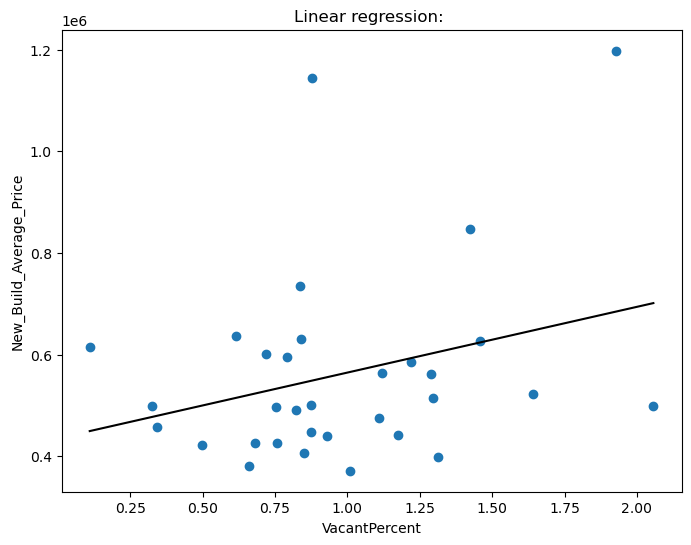

0.08575774000877256


In [122]:
# Define predictive and target variables
x = df_CoreHousing['VacantPercent']
x = np.array(x).reshape((-1, 1)) # we need to work with a np array and to reshape it

y = df_CoreHousing['New_Build_Average_Price']

# Create and fit model
model = LinearRegression()
model.fit(x, y)

#get coefficients and r2
r2 = model.score(x,y)
coefficients = model.coef_
intercept = model.intercept_

# Init plots
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(df_CoreHousing['VacantPercent'], df_CoreHousing['New_Build_Average_Price'])

# Define parameters of the regression line
num = len(df_CoreHousing)
start = df_CoreHousing['VacantPercent'].min()
end = df_CoreHousing['VacantPercent'].max()
xseq = np.linspace(start, end, num=num)

# Plot the line
ax.plot(xseq, intercept+coefficients[0]*xseq, color="black", lw=1.5)

# Add a title and axis label
ax.set_title('Linear regression: ')
ax.set_xlabel('VacantPercent')
ax.set_ylabel('New_Build_Average_Price')

# Show the plot
plt.show()
print (r2)